In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [31]:
# Load the dataset
data = pd.read_csv("/content/diabetes_prediction_dataset.csv")

# Check for and handle missing values in labels
data.dropna(subset=['diabetes'], inplace=True)

In [32]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0


In [33]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
55040,Male,59.0,0.0,0.0,ever,32.26,6.0,90.0,0.0
55041,Male,70.0,0.0,0.0,former,26.88,5.8,140.0,1.0
55042,Male,13.0,0.0,0.0,never,20.54,4.0,140.0,0.0
55043,Male,52.0,0.0,0.0,never,29.05,6.1,140.0,0.0
55044,Male,47.0,0.0,0.0,No Info,27.32,4.5,160.0,0.0


In [34]:
# Separate features and labels
X = data.drop('diabetes', axis=1)
Y = data['diabetes']

In [35]:
print(X)
print(Y)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0           0.0            1.0           never  25.19   
1      Female  54.0           0.0            0.0         No Info  27.32   
2        Male  28.0           0.0            0.0           never  27.32   
3      Female  36.0           0.0            0.0         current  23.45   
4        Male  76.0           1.0            1.0         current  20.14   
...       ...   ...           ...            ...             ...    ...   
55040    Male  59.0           0.0            0.0            ever  32.26   
55041    Male  70.0           0.0            0.0          former  26.88   
55042    Male  13.0           0.0            0.0           never  20.54   
55043    Male  52.0           0.0            0.0           never  29.05   
55044    Male  47.0           0.0            0.0         No Info  27.32   

       HbA1c_level  blood_glucose_level  
0              6.6                140.0  
1              

In [36]:
# Ensure labels are integers
Y = Y.astype(int)

# Encode categorical features
le = LabelEncoder()
X['gender'] = le.fit_transform(X['gender'])
X['smoking_history'] = le.fit_transform(X['smoking_history'])

In [37]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the shapes of X_scaled and Y to ensure they match
print(f"X_scaled shape: {X_scaled.shape}")
print(f"Y shape: {Y.shape}")

# Ensure data cardinality matches
assert X_scaled.shape[0] == Y.shape[0], "Mismatch in number of samples between X and Y"

X_scaled shape: (55045, 8)
Y shape: (55045,)


In [38]:
mean_values = scaler.mean_
scale_values = scaler.scale_

print("Mean Values:", mean_values)
print("Scale Values:", scale_values)

Mean Values: [4.13461713e-01 4.18698221e+01 7.49205196e-02 3.88954492e-02
 2.18308657e+00 2.73314050e+01 5.52818785e+00 1.37928677e+02]
Scale Values: [ 0.49282295 22.49321897  0.26326305  0.19334579  1.88793519  6.64944704
  1.07190128 40.98443128]


# 0---> Non-diabetic

# 1---> diabetic


In [39]:
# Define the neural network model
model = tf.keras.Sequential(name="my_neural_network_model")
model.add(tf.keras.layers.Dense(units=16, input_shape=(X_scaled.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_scaled, Y, epochs=10, batch_size=10, validation_split=0.2)

# Save the model to a file
model.save('my_neural_network_model.h5')


Epoch 1/10
4404/4404 [==============================] - 12s 3ms/step - loss: 0.1363 - accuracy: 0.9490 - val_loss: 0.1168 - val_accuracy: 0.9608
Epoch 2/10
4404/4404 [==============================] - 11s 2ms/step - loss: 0.1072 - accuracy: 0.9619 - val_loss: 0.1078 - val_accuracy: 0.9645
Epoch 3/10
4404/4404 [==============================] - 11s 3ms/step - loss: 0.1014 - accuracy: 0.9644 - val_loss: 0.1030 - val_accuracy: 0.9645
Epoch 4/10
4404/4404 [==============================] - 13s 3ms/step - loss: 0.0954 - accuracy: 0.9672 - val_loss: 0.0974 - val_accuracy: 0.9680
Epoch 5/10
4404/4404 [==============================] - 10s 2ms/step - loss: 0.0915 - accuracy: 0.9683 - val_loss: 0.0962 - val_accuracy: 0.9683
Epoch 6/10
4404/4404 [==============================] - 11s 2ms/step - loss: 0.0887 - accuracy: 0.9698 - val_loss: 0.0918 - val_accuracy: 0.9688
Epoch 7/10
4404/4404 [==============================] - 11s 2ms/step - loss: 0.0868 - accuracy: 0.9703 - val_loss: 0.0919 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_scaled, Y, verbose=2)

# Print the evaluation metrics
print("Test accuracy:", accuracy)
print("Test loss:", loss)

1721/1721 - 2s - loss: 0.0842 - accuracy: 0.9707 - 2s/epoch - 1ms/step
Test accuracy: 0.9707148671150208
Test loss: 0.0841917097568512


Epoch 1/10
2936/2936 [==============================] - 7s 3ms/step - loss: 0.0835 - accuracy: 0.9710 - val_loss: 0.0886 - val_accuracy: 0.9695
Epoch 2/10
2936/2936 [==============================] - 6s 2ms/step - loss: 0.0832 - accuracy: 0.9707 - val_loss: 0.0880 - val_accuracy: 0.9692
Epoch 3/10
2936/2936 [==============================] - 8s 3ms/step - loss: 0.0829 - accuracy: 0.9710 - val_loss: 0.0889 - val_accuracy: 0.9688
Epoch 4/10
2936/2936 [==============================] - 6s 2ms/step - loss: 0.0827 - accuracy: 0.9711 - val_loss: 0.0889 - val_accuracy: 0.9691
Epoch 5/10
2936/2936 [==============================] - 8s 3ms/step - loss: 0.0823 - accuracy: 0.9717 - val_loss: 0.0897 - val_accuracy: 0.9688
Epoch 6/10
2936/2936 [==============================] - 6s 2ms/step - loss: 0.0823 - accuracy: 0.9710 - val_loss: 0.0892 - val_accuracy: 0.9679
Epoch 7/10
2936/2936 [==============================] - 8s 3ms/step - loss: 0.0820 - accuracy: 0.9713 - val_loss: 0.0895 - val_accuracy:

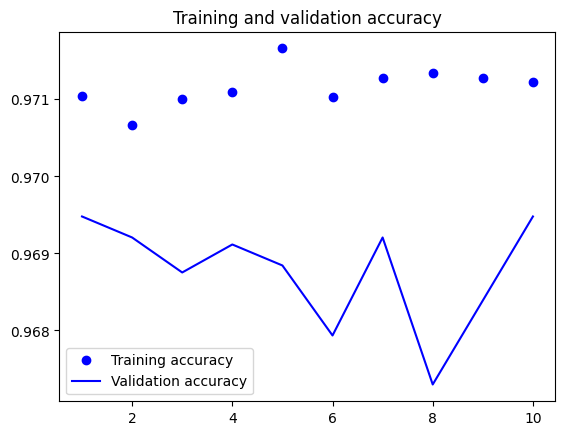

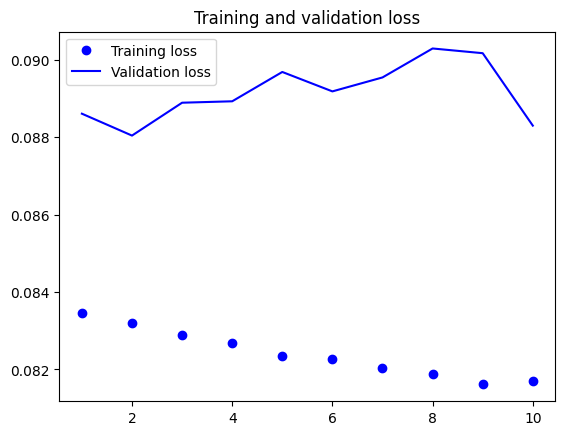

In [41]:
# Fit the model to the training data
history = model.fit(X_scaled, Y, epochs=10, batch_size=15, validation_split=0.2)

# Plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
from sklearn.metrics import f1_score, confusion_matrix

In [43]:
# Make predictions on the test data
y_pred = model.predict(X_scaled)

1721/1721 [==============================] - 2s 1ms/step


In [44]:
from sklearn.metrics import f1_score, confusion_matrix

# Calculate F1 score
f1 = f1_score(Y, Y, average='binary')
print("F1 score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y, Y)
print("Confusion matrix:\n", conf_matrix)

F1 score: 1.0
Confusion matrix:
 [[50285     0]
 [    0  4760]]


## Preprocess user inputs

In [57]:
# Load the trained model
model = tf.keras.models.load_model('my_neural_network_model.h5')

# Load the original dataset for preprocessing purposes
original_data = pd.read_csv("/content/diabetes_prediction_dataset.csv")

# Drop rows with missing target values
original_data.dropna(subset=['diabetes'], inplace=True)

# Separate features and labels
X = original_data.drop('diabetes', axis=1)

# Encode categorical features
le_gender = LabelEncoder().fit(X['gender'])
le_smoking_history = LabelEncoder().fit(X['smoking_history'])
X['gender'] = le_gender.transform(X['gender'])
X['smoking_history'] = le_smoking_history.transform(X['smoking_history'])

# Standardize the feature values
scaler = StandardScaler().fit(X)

# Function to preprocess new input data
def preprocess_input(data, scaler, le_gender, le_smoking_history):
    # Convert to DataFrame if necessary
    if isinstance(data, dict):
        data = pd.DataFrame([data])
    elif isinstance(data, list):
        data = pd.DataFrame(data)

    # Encode categorical features
    data['gender'] = le_gender.transform(data['gender'])
    data['smoking_history'] = le_smoking_history.transform(data['smoking_history'])

    # Standardize numerical features
    data_scaled = scaler.transform(data)

    return data_scaled

# Testing with user data


In [59]:
# Sample new data for prediction
new_data = {
    'gender': 'Male',
    'age': 50,
    'hypertension': 1,
    'heart_disease': 0,
    'smoking_history': 'current',
    'bmi': 78.5,
    'HbA1c_level': 5.9,
    'blood_glucose_level': 200
}

# Assuming 'scaler', 'le_gender', and 'le_smoking_history' are pre-defined
new_data_scaled = preprocess_input(new_data, scaler, le_gender, le_smoking_history)

# Make predictions
predictions = model.predict(new_data_scaled)

# Decode the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Define labels for interpretation
class_labels = {0: "non-diabetic", 1: "diabetic"}

# Output the predictions with labels
predicted_label = class_labels[predicted_class[0]]
print(f"Predicted class: {predicted_class[0]} ({predicted_label})")
print(f"Prediction confidence: {predictions[0]}")  # Probabilities for each class


1/1 [==============================] - 0s 40ms/step
Predicted class: 1 (diabetic)
Prediction confidence: [0.2625696  0.73743033]
